<a id='Title'></a> 
<img src="title.png">

# Executive Summary
    


In today’s digital world, most companies attempt to accomplish virality, because it provides great impact at a fraction of the cost. This study attempts to predict if an online article will be popular in terms of the number of shares it will get. This study used the statistics of Mashable online article from the UCI Machine Learning repository. The study was able to predict news popularity with a 97% accuracy, 98% f1 score for unpopular articles, and 72% f1 score for popular articles using SMOTEENN and Gradient Boosting Classifier. The study was able to identify the top predictors of popular articles and the direction of each feature. 

The findings of this study can be used by Mashable as a Decision Support Tool to guide its operations on engineering virality. The value of this tool is that the features used to predict the popularity can be extracted even before posting the article. This means that after going through the writing and editing process, they can test if the article will be popular using this tool. If the article will be unpopular, they have the option to edit it first guided by the insights from the SHAP summary plot.

<a id='top'></a>

# Table of Contents


1. [<font size=4.5>Introduction</font>](#Introduction) <br>
2. [<font size=4.5>Data Description and Preprocessing</font>](#Data_Description_and_Processing) <br>
3. [<font size=4.5>Exploratory Data Analysis</font>](#Exploratory_Data_Analysis) <br>
4. [<font size=4.5>Data Balancing and Models Selection</font>](#Models_and_Results)<br>
5. [<font size=4.5>Conclusion and Insights</font>](#Conclusion_and_Insights) <br>
6. [<font size=4.5>Future Studies</font>](#Future_Studies)<br>
7. [<font size=4.5>References</font>](#References)<br>
8. [<font size=4.5>Acknowledgments</font>](#Acknowledgments)



<font size=3> Loading the preliminary libraries.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from IPython.display import HTML
from IPython.display import clear_output
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import model_selection, preprocessing


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.naive_bayes import MultinomialNB

import mglearn
import shap

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.4g}'.format
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

<a id='Introduction'></a>

# 1. Introduction</font> 
[Back to Table of Contents](#top)


In today’s digital world, most companies attempt to accomplish virality, because it provides great impact at a fraction of the cost. This study attempts to predict if an online article will be popular in terms of the number of shares it will get. This study used the statistics of Mashable online article from the UCI Machine Learning repository.

The original dataset was created by K. Fernandes, et al. on their study "A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News" published in Springer International Publishing Switzerland 2015. The study discretized the dataset into two categories, unpopular and popular. They got the median 1,400 shares to discretized the two categories which produced two balanced classes. They tried to predict whether an article will be popular or not and achieved a 67% accuracy.

This study proposed a different approach in discretizing the popularity. This study considered that only articles with more than 10,000 shares are popular. The popular articles are only 6% of the dataset which required some balancing before implementation of machine learning models.

This will be the process flow of the study.
1. Data Preprocessing 
2. Data Discretisation
3. Data Balancing with Over and Under Sampling using SMOTE ENN
4. Model Selection using GridSearch
5. SHAP Feature Importance Analysis
5. Results and Insights

<a id='Data_Description_and_Processing'></a>

# 2. Data Description and Preprocessing</font>
[Back to Table of Contents](#top)


The articles in the dataset were published and are owned by Mashable (www.mashable.com) 
Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls. 

The data covers a two year period from 2013-2015 with a  totoal of 39,000 articles. The authors extracted 47 features from the articles. They extracted features relatated to words used in the articles and digital media in the articles. They selected different statistics that were possibly relevant to the number of shares. It included statistics on presence of keywords that are present on articles with a high number for shares. They also extracted several Natural Language Processing (NLP) features. They applied Latent Dirichlet Allocation (LDA) algorithm to indicate the closeness of each article to the top five prevalent topics in Mashable.

Link: https://archive.ics.uci.edu/ml/datasets/online+news+popularity


In [167]:
df = pd.read_csv('OnlineNewsPopularity.csv')
display(df.head(), df.shape)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6636,1,0.8154,4,2,1,...,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047,1,0.7919,3,1,1,...,0.03333,0.7,-0.1187,-0.125,-0.1,0,0,0.5,0,711
2,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751,1,0.6639,3,1,1,...,0.1,1,-0.4667,-0.8,-0.1333,0,0,0.5,0,1500
3,http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5038,1,0.6656,9,0,1,...,0.1364,0.8,-0.3697,-0.6,-0.1667,0,0,0.5,0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,"1,072",0.4156,1,0.5409,19,19,20,...,0.03333,1,-0.2202,-0.5,-0.05,0.4545,0.1364,0.04545,0.1364,505


(39644, 61)

HEre are the features used in the dataset as taken from UCI Machine Learning Repository.


Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field) 

Attribute Information: 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

Check if there are null values that we need to correct.

In [168]:
df.isnull().sum().sum()

0

No, null values. This is expected because the dataset from UCI is a clean dataset already.

<a id='Exploratory_Data_Analysis'></a>

# 3. Exploratory Data Analysis</font> 
[Back to Table of Contents](#top)


Let's look at the histogram plot of our target, the number of shares.

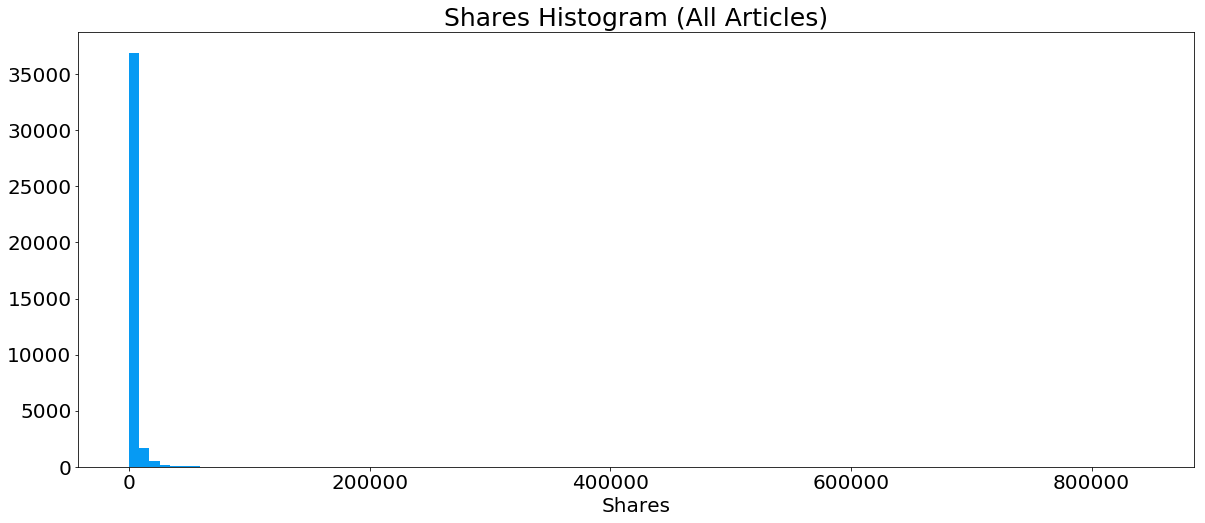

In [169]:
plt.figure(figsize=[20,8])
plt.rcParams['axes.facecolor']='white'

fig = plt.hist(df[' shares'], bins=100, color='xkcd:azure');
plt.title('Shares Histogram (All Articles)', fontsize=25);
plt.xlabel('Shares', fontsize=20);

Since it is rare to have an article that has a lot of shares. It is quite expected that the histogram will be heavily right skewed. Let's zoom in into the wall seen in the histogram above.

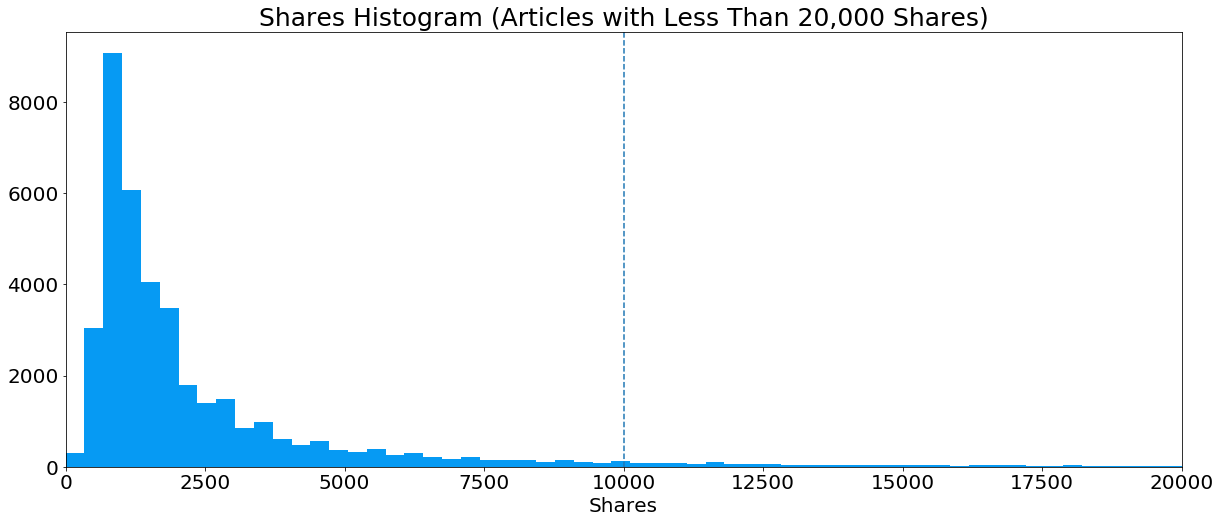

In [170]:
plt.figure(figsize=[20,8])
plt.rcParams['axes.facecolor']='white'
fig = plt.hist(df[' shares'], bins=2500, color='xkcd:azure')

plt.title('Shares Histogram (Articles with Less Than 20,000 Shares)', fontsize=25);
plt.xlabel('Shares', fontsize=20);
plt.axvline(10000, linestyle='--')
plt.xlim(0,20000);

We can see in the histogram that there are only few articles that get beyond 10,000 shares. In this study, let's take 10,000 shares as the threshold to identify if an article is popular or not.

In [171]:
new_col = []
for i in range(len(df)):
    if df.iloc[i][' shares'] <= 10000:
        new_col.append(0)
    elif df.iloc[i][' shares'] > 10000:
        new_col.append(1)
df['target'] = new_col

Let's check the proportion chance criteria to evaluate what's the probability of predicting the right class given the discretized dataset.

Population per class:        0
0  37459
1  2185 

Minority class: 5.5115528200988795%
Proportion Chance Criterion: 89.58443864957705%
1.25 * Proportion Chance Criterion: 111.9805483119713%


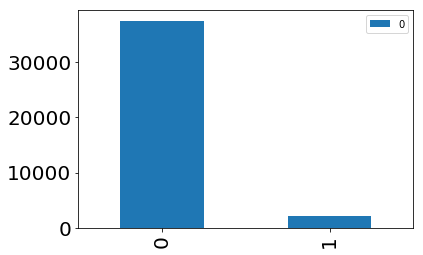

In [209]:
state_counts = Counter(df['target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("Minority class: {}%".format(100*(df_state.loc[1]/df_state.sum()).values[0]))
print("Proportion Chance Criterion: {}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

We see that the popular class is only 5.5% of the population which shows that it is imbalanced. This also explains the high PPC of 89.58%. 

When predicting highly imbalanced datasets, it is easy to get a high accuracy but a very poor precision and recall. This indicates that balancing must be done in order to get a good precision and recall.

Let's prepare our features and target data to be inputed in our train-test split, before we process with the data balancing.

<a id='Models_and_Results'></a>

# 4. Data Balancing and Model Selection</font> 
[Back to Table of Contents](#top)


In [173]:
df_X = df.drop([' shares', 'url',' timedelta'], axis=1)

In [174]:
df_target = df['target']
df_features = df.drop([' shares', 'url','target',' timedelta'], axis=1)
feature_names = df_features.columns
X = df_features[feature_names]
y = df_target

display(X.head(), X.shape)
# display(y.head(), y.shape)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.6636,1,0.8154,4,2,1,0,4.68,...,0.3786,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0,0.1875
1,9,255,0.6047,1,0.7919,3,1,1,0,4.914,...,0.2869,0.03333,0.7,-0.1187,-0.125,-0.1,0,0,0.5,0
2,9,211,0.5751,1,0.6639,3,1,1,0,4.393,...,0.4958,0.1,1,-0.4667,-0.8,-0.1333,0,0,0.5,0
3,9,531,0.5038,1,0.6656,9,0,1,0,4.405,...,0.386,0.1364,0.8,-0.3697,-0.6,-0.1667,0,0,0.5,0
4,13,"1,072",0.4156,1,0.5409,19,19,20,0,4.683,...,0.4111,0.03333,1,-0.2202,-0.5,-0.05,0.4545,0.1364,0.04545,0.1364


(39644, 58)

# Combined Over and Under Sampling using SMOTEENN

 There are three common ways of balancing data. Oversampling, undersampling, and combined over and under sampling. The best result obtained for the study is combined over and under sampling using SMOTEENN.


SMOTE stands for Synthetic Minority Over-sampling Technique. It generates samples by the minority's k nearest neighbors instead of oversampling with replacement. However this is naive of the underlying distribution and can produce noisy samples. A technique called Edited Nearest Neighbors (ENN) applies under-sampling to clean the noisy samples after. 

Link: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html

In [175]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y,
                                                            random_state=1)
# sampler = RandomUnderSampler()
# sampler = SMOTE()
sampler = SMOTEENN(sampling_strategy='not majority',random_state=0)
X_train, y_train = sampler.fit_sample(X_train, y_train)
display(X_train.shape)
y_train.sum()

(43906, 58)

25084

'Population per class:        0\n0  18822\n1  25084\n'

'Minority class: 57.131143807224525%'

'Proportion Chance Criterion: 51.01706423998633%'

'1.25 * Proportion Chance Criterion: 63.771330299982914%'

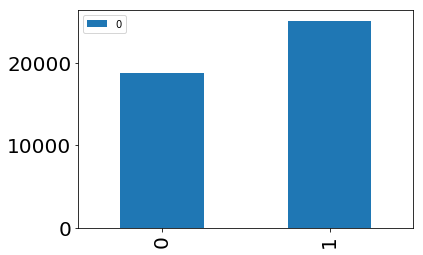

In [176]:
import numpy as np
from collections import Counter
state_counts = Counter(y_train)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2
display("Population per class: {}\n".format(df_state))
display("Minority class: {}%".format(100*(df_state.loc[1]/df_state.sum()).values[0]))
display("Proportion Chance Criterion: {}%".format(100*num.sum()))
display("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

The data looks balanced now. And we can see that the 1.25*PCC is 64%.

Now that our data has been preprocessed, let's run it using three machine learning classifier models: Logistic Regression with L1 regularization, Decision Tree, and Gradient Boosting.

Logistic Regression with L1 regularization is a fast, simple and very interpretable error based learning model.
Decision Trees are fast and easy to understand and implement information based learning model.
Gradient Boosting is recognized as one of the best performing alogrithm next to xgboost that uses weaker decision trees and increasingly build from it.

Let's use Grid Search to find the optimal hyperparameters with the highest accuracy. The Grid Search will be using the default 5 fold cross validation.

In [117]:
cl1 = KNeighborsClassifier(n_jobs=-1)
cl2 = LogisticRegression(penalty='l1', max_iter=1000,
                         solver='liblinear', n_jobs=-1)
cl3 = LogisticRegression(penalty='l2', max_iter=1000, n_jobs=-1)
cl4 = LinearSVC(penalty='l1', dual=False, max_iter=10000)
cl5 = LinearSVC(penalty='l2', max_iter=10000)
cl6 = SVC(kernel='rbf', )
cl7 = SVC(kernel='poly', degree=3)
cl8 = DecisionTreeClassifier()
cl9 = RandomForestClassifier(n_estimators=500, n_jobs=-1)
cl10 = GradientBoostingClassifier(n_estimators=500)

kneighbors = range(1, 31)
C_list = np.logspace(-5, 5, num=10)
gamma_list = np.logspace(-5, 5, num=10)
learning_rate_list = [.2, 0.1, 0.05]
max_depth_list = [3, 4, 6]
min_samples_leaf_list = [2, 3, 4]
max_features_list = [.5, .3, .2]

estimators = [('Logistic Regression (L1)', cl2, {'C': C_list}),
              ('Decision Tree', cl8, {'max_depth': max_depth_list}),
              ('Gradient Boosting', cl10, {'learning_rate': learning_rate_list, 'max_depth': max_depth_list, 'min_samples_leaf': min_samples_leaf_list, 'max_features': max_features_list})]

In [118]:
models = {}
for est in estimators:
    print(f'Training {est}\n')
    gs_cv = model_selection.GridSearchCV(est[1], param_grid=est[2], n_jobs=-1, cv=5, verbose=1)
    gs_cv.fit(X_train, y_train)
    models[est[0]] = gs_cv

Training ('Logistic Regression (L1)', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), {'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])})

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


Training ('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), {'max_depth': [6]})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Training ('Gradient Boosting', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), {'learning_rate': [0.1], 'max_depth': [6], 'min_samples_leaf': [4], 'max_features': [0.5]})

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


In [119]:
cols = ['Machine Learning Method', 'Test Accuracy',
        'Best Parameter', 'Top Predictor Variable']
df = pd.DataFrame(columns=cols)

for i, m in enumerate(models):
    
    try:
        top_predictor = X.columns[
            np.argmax(np.abs(models[m].best_estimator_.coef_))]

    except AttributeError:
        top_predictor = np.nan
    
    df.loc[i] = [m, 
                 models[m].best_estimator_.score(X_val, y_val),
                 models[m].best_params_ ,
                 top_predictor]

<a id='Results'></a>

## 4.1 Results</font> 
[Back to Table of Contents](#top)


In [120]:
df

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,Logistic Regression (L1),0.607,{'C': 3.593813663804626},global_rate_positive_words
1,Decision Tree,0.7807,{'max_depth': 6},NaN
2,Gradient Boosting,0.9326,"{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 4}",NaN


The results show that Gradient Boosting achieved the highest accuracy with 93.26%. Let's look at the confusion matrix to see the actual performance of the model in identifying the popular and unpopular articles.

# CONFUSION MATRIX

49


0.9701866612854404

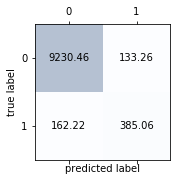

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9349
           1       0.74      0.70      0.72       562

    accuracy                           0.97      9911
   macro avg       0.86      0.84      0.85      9911
weighted avg       0.97      0.97      0.97      9911



In [124]:
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
confmat = {}
score = []
for i in range(50):
    clear_output()
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
    sampler = SMOTEENN(sampling_strategy='not majority',random_state=0)
    X_train, y_train = sampler.fit_sample(X_train, y_train)
#     reg = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features=0.5, min_samples_leaf=4)
#     reg.fit(X_train, y_train)
    y_pred = models['Gradient Boosting'].best_estimator_.predict(X_test)
    score.append(models['Gradient Boosting'].best_estimator_.score(X_test,y_test))
    confmat[i] = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
display(np.mean(score))
lahat = np.zeros(shape=(2,2))
for i in range(50):
    lahat += confmat[i]
    
confmat = lahat/50
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

The confusion matrix shows that the model was able to predict 70% of the popular articles with a 70% precision.
It shows that the model was able to predict 98% of the unpopular articles with a 98% precision.

This shows that the model is better in identifying the majority class than the minority class. However, it is important to note that this is a big improvement from the 1% recall obtained when no balancing and oversampling were used.

# FEATURE IMPORTANCE

We will use SHAP to further interpret how features impact the prediction. SHAP is a library that was created to help solve the interpretability of ensembles.

Let's make an instant of the SHAP TreeExplainer using the model we got from our model selection.

Let's look at the usual feature importance chart first.

In [55]:
import shap
# reg - change this to the object of your classifier
reg = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features=0.5, min_samples_leaf=4)
reg.fit(X_train, y_train)
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X)

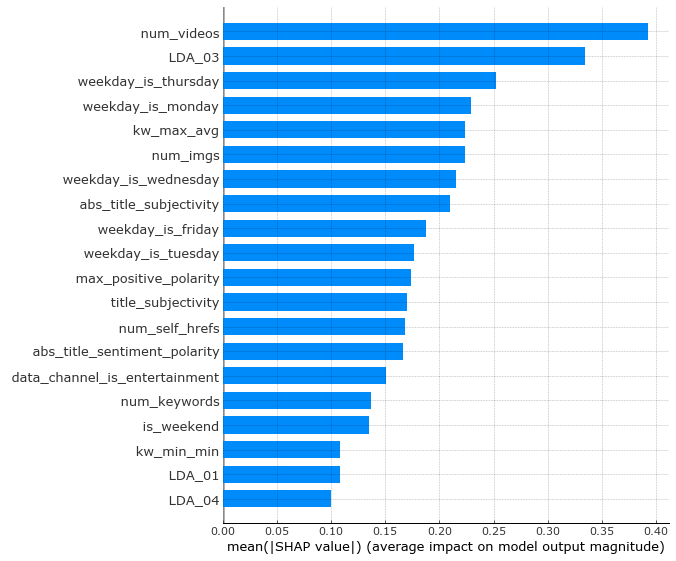

In [77]:
shap.summary_plot(shap_values, X, plot_type="bar")

The feature importance plot is useful because it ranks the features that have the most impact to the target. It accounts for all the instances in the dataset and summarizes how each feature impacts the prediction collectively. We see here that the high number of videos and weekday posts are very important features.

However, we are posed with a challenge in interpretation of a positive or negative correlation because there is not direction indicated in the feature importance.

This is where the SHAP package is very useful. Let's show the SHAP summary plot for the top 10 features.

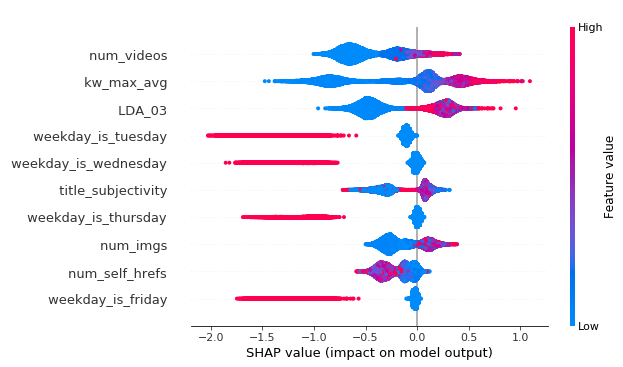

In [62]:
shap.summary_plot(shap_values, X, max_display=10)


The SHAPsummary plot above shows the top 10 features and its correspodning impact to the target. The plot is like a horizontal violinplot, where each point in the plot is an instance.

Let's take `num_videos` as an example. A high value of the `num_videos` feature would correspond to a more pink color and a lower value would correspond to a blue color. The point will be plotted on the positive SHAP x-axis if the impact is positive, meaning it is popular. And it will be plotted on the negative SHAP x-axis if the impact is negative, meaning it is unpopular. 

This gives us the interpretation that `num_videos`, `kw_max_avg`, and `LDA_03` are positively correalted with popularity and they are the top three most important features. Additionally, weekday posts are negatively correlated with popularity and they are within the top ten most important features. 

Although it is still hard to interpret features like title_subjectivity where the impact is not clearly separated. This makes the feature unreliable to be used as basis or manipulated.

This is a great additional insight compared to just looking at the feature importance graph that has no direction.

From this summary plot we can summarize the findings as the following Call to Actions.

<a id='Action'></a> 
<img src="action.png">

This summary of what to do less and what to do more can be easily interpreted by the stakeholders and are very actionable.

<a id='Conclusion_and_Insights'></a>

# 5. Conclusion and Insights</font> 
[Back to Table of Contents](#top)


The study was able to predict news popularity with a 97% accuracy, 98% f1 score for unpopular articles, and 72% f1 score for popular articles using SMOTEENN and Gradient Boosting Classifier. The study was able to identify the top predictors of popular articles and the direction of each feature.


<a id='Decision Support Tool'></a> 
<img src="decision.png">

The findings of this study can be used by Mashable as a Decision Support Tool to guide its operations on engineering virality. The value of this tool is that the features used to predict the popularity can be extracted even before posting the article. This means that after going through the writing and editing process, they can test if the article will be popular using this tool. If the article will be unpopular, they have the option to edit it first guided by the insights from the SHAP summary plot. If the article is predicted to be popular, they have the option to boost the post in order to increase the chances of virality. We recommend boosting the post since the precision and recall is only 72%, which means there is still a chance that it will be incorrect 30% of the time.

Ultimately, this is a very useful decision support tool that can help Mashable engineer virality.

<a id='Future_Studies'></a>

# 6. Future Studies</font> 
[Back to Table of Contents](#top)


The analysis presented in this study shows proof that online news popularity can be predicted using Machine Learning. However, it is limited within the cpntext of the articles from Mashable. Future applications of this study can be done on any company on a local or global context. It can be suggested as well to apply the same framework to a corpus of publishing companies to develop a more generalized model. 

Other machine learning algorithms such as xgboost and neural networks can also be used in future studies.

<a id='References'></a>

# 7. References</font> 
[Back to Table of Contents](#top)


<font size=3>
- K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.<br>
- UCI Machine Learning Repository<br>
- Mashable<br>
- Towards Data Science<br>

<a id='Acknowledgments'></a>

# 8. Acknowledgments</font> 
[Back to Table of Contents](#top)


<font size=3>
    
- Prof. Christopher Monterola<br>
- Prof. Erika Legara<br>
- Prof. Christian Alis<br>
- Prof. Ed David<br>
- Gilbert Chua, Chelsea Ong, and Myin Rebanal<br>
- Rosely Peña and Gio Fontanilla

This research is implemented in fulfilment of the requirements of the Machine Learning course of the Master of Science in Data Science under the Asian Institute of Management.